In [32]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import argparse
import os
import cv2
import seaborn as sns
sns.set()
#import tensorflow.compat.v1 as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import pandas as pd
from sklearn import svm, datasets
DATADIR = "/Users/kayla/Desktop/asl_dataset"
#CATEGORIES = ["3", "4", "5", "6","7","8","9"]
CATEGORIES = ["a", "b", "c"]

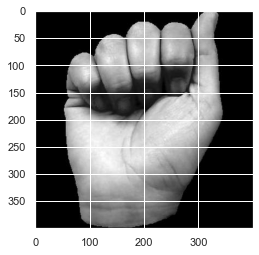

In [25]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

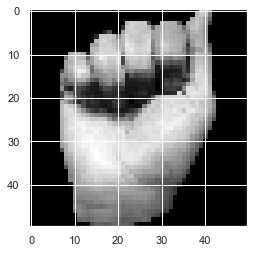

In [26]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [27]:
training_data = []
num_img_perclass = []
def create_training_data():
    for category in CATEGORIES:
        count = 0
        path = os.path.join(DATADIR, category)
        class_num = pd.Categorical(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
                count = count + 1
            except Exception as e:
                pass
        num_img_perclass.append(count)    
    return training_data

training_data = create_training_data()

/var/folders/6y/y3n9j25d25927q2cnvvj7xc00000gn/T/ipykernel_5599/400694763.py:7: FutureWarning: Allowing scalars in the Categorical constructor is deprecated and will raise in a future version.  Use `[value]` instead
  class_num = pd.Categorical(category)


210
(50, 50)


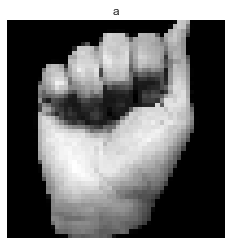

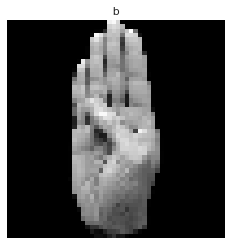

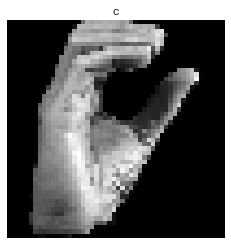

In [28]:
print(len(training_data))
print(training_data[0][0].shape)

#plt.imshow(training_data[93][0], cmap = 'gray')
#plt.show()
label_data = []
num_of_classes = len(num_img_perclass)
for img in range(0,num_of_classes):
    plt.imshow(training_data[num_img_perclass.__getitem__(img)*img][0], cmap = 'gray')
    plt.title(training_data[num_img_perclass.__getitem__(img)*img][1][0])
    plt.axis('off')
    plt.show()
#Convert to categorical#
#y = to_categorical(labels)
#print(y)
#labels

In [29]:
# Creating data for training and testing; taking 80% of data for training per class.
image_train = []
label_train = []
for features, label in training_data:
    image_train.append(features)
    label_train.append(label[0])

X_train, X_validation, y_train, y_validation = train_test_split(image_train, label_train, test_size=0.2, shuffle=True)

# start_img = 0
# end_img = 0
# end_img = num_img_perclass.__getitem__(0) + end_img -1
# images = training_data[1][0]
# labels = training_data[start_img:end_img][1][0]
# for img in range(0,num_of_classes):
#     end_img = num_img_perclass.__getitem__(img) + end_img
#     X_train, X_validation, y_train, y_validation = train_test_split(training_data[start_img:end_img][0], training_data[start_img:end_img][1][0], 
#                                                                     test_size=0.2, shuffle=True)
#     start_img = start_img + end_img -1

In [31]:
# we create an instance of SVM and fit out data. 
C = 1.0 # SVM regularization paramerter
svc = svm.SVC(kernel='linear', C=1, gamma= 'auto').fit(x,y)

NameError: name 'svm' is not defined

In [30]:
# import some data 
iris = 
x = iris.data[:,:2] # we ony take the first two features
y = iris.target

SyntaxError: invalid syntax (3156284029.py, line 2)

In [33]:
# we create an instance of SVM and fit out data. 
C = 1.0 # SVM regularization paramerter
svc = svm.SVC(kernel='poly', C=1, gamma= 'auto').fit(x,y)

NameError: name 'x' is not defined

In [34]:
# create a mesh to plot in
x_min, x_max = x[:,0].min() - 1, x[:,0].max() + 1
y_min, y_max = x[:,1].min() - 1, x[:,1].max() + 1
h = (x_max/x_min)/100
xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min, y_max, h))


NameError: name 'x' is not defined

NameError: name 'svc' is not defined

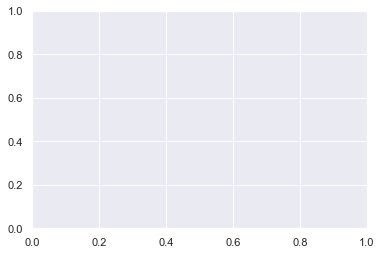

In [35]:
plt.subplot(1,1,1)
z = svc.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)
plt.contour(xx,yy,z,cmp=plt.cm.Paired,alpha=0.8)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Paired)
plt.xlabel('Sepal lenght')
plt.ylabel('Sepal width')
plt.xlim(xx.min(),xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=42)
svc = svm.SVC(kernel='poly', C=1, gamma= 'auto').fit(x_train,y_train)

In [ ]:
classification_results = svc.predict(x_test)
print(metrics.classification_report(classification_results,y_test))

In [ ]:
title_options = [("Confusion matrix, without normalization", None)]

for title, normalize in title_options:
    disp = plot_confusion_matrix(svc, x_test, y_test, cmap=plt.cm.Blues, normalize=normalize)
    disp.ax_.set_title(title)


    print(title)
    print(disp.confusion_matrix)
plt.show()